In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import statsmodels.api as sm
import scipy
import seaborn as sns

# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re
plt.rc( 'font', family = 'serif')

In [4]:
data_file = f'../data/pic/2021-08-30_strong_scaling/pic_strong_scaling_combined_clean.txt'
df = pd.read_csv(data_file)
df.columns

Index(['Trial', 'Framework', 'Num Processes', 'Num Chares', 'Simulation Time',
       'Num Iterations'],
      dtype='object')

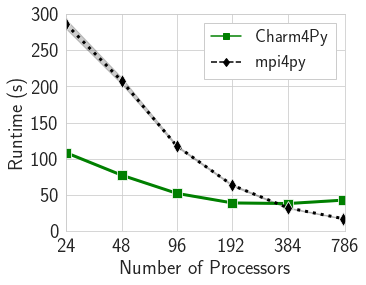

In [41]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Simulation Time", data=df,hue="Framework", style="Framework",
              palette = ['green','black'],ax=ax,ci=99, markers=['s', 'd'], dashes=True,
              linewidth=3, markersize=10)
ax.set_xlim(24,768)
ax.lines[1].set_linestyle(":")
ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)
ax.legend(fontsize = 18, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.set_ylabel('Runtime (s)', fontsize=20)
ax.set_xlabel('Number of Processors', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,300)
ax.set_yticks([0,50,100,150,200,250,300])
ax.set_xticks([24, 48, 96, 192, 384, 786])
ax.set_xticklabels([24, 48, 96, 192, 384, 786])
ax.set_yticklabels([0,50,100,150,200,250,300])
plt.savefig('pic_strong_scaling.pdf', bbox_inches='tight', dpi=300)